# **Studi Kasus Heart Disease 5**

Implementasi dengan menggunakan `Naive Bayes` , `K-NN` , `K-Means Clustering` dan `Decision Tree`

## Membaca Data

In [57]:
import pandas as pd

data = pd.read_csv('https://raw.githubusercontent.com/soumya-mishra/Heart-Disease_DT/main/heart_v2.csv')
data

,age,sex,BP,cholestrol,heart disease
0,70,1,130,322,1
1,67,0,115,564,0
2,57,1,124,261,1
3,64,1,128,263,0
4,74,0,120,269,0
...,...,...,...,...,...
265,52,1,172,199,0
266,44,1,120,263,0
267,56,0,140,294,0
268,57,1,140,192,0


### Class

In [58]:
y_class = data['heart disease']
y = y_class.values.tolist()
print(y[:5])

[1, 0, 1, 0, 0]


### Drop Target / Class

In [59]:
X = data.drop(columns='heart disease')
X


,age,sex,BP,cholestrol
0,70,1,130,322
1,67,0,115,564
2,57,1,124,261
3,64,1,128,263
4,74,0,120,269
...,...,...,...,...
265,52,1,172,199
266,44,1,120,263
267,56,0,140,294
268,57,1,140,192


## Preprocessing Min-Max

Normalisasi data menggunakan `Min - Max`

In [60]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled = scaler.fit_transform(X)
nama_fitur = X.columns.copy()
scaled_fitur = pd.DataFrame(scaled,columns=nama_fitur)
scaled_fitur

,age,sex,BP,cholestrol
0,0.854167,1.0,0.339623,0.447489
1,0.791667,0.0,0.198113,1.000000
2,0.583333,1.0,0.283019,0.308219
3,0.729167,1.0,0.320755,0.312785
4,0.937500,0.0,0.245283,0.326484
...,...,...,...,...
265,0.479167,1.0,0.735849,0.166667
266,0.312500,1.0,0.245283,0.312785
267,0.562500,0.0,0.433962,0.383562
268,0.583333,1.0,0.433962,0.150685


### Save Normalisasi

In [61]:
import joblib
filename = '/content/drive/MyDrive/datamining/tugas/cobamodel/norm.sav'
joblib.dump(scaler, filename) 

['/content/drive/MyDrive/datamining/tugas/cobamodel/norm.sav']

In [62]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Split Data

split data **20%**

In [63]:
from sklearn.model_selection import train_test_split
from pathlib import Path  
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=1)
# save data test

filepath = Path('/content/drive/MyDrive/datamining/tugas/cobamodel/data_test.csv')  
filepath.parent.mkdir(parents=True, exist_ok=True) 
X_test.to_csv(filepath)

## Inisialisasi Model `Naive Bayes` (gaussian)

### Eksekusi pada Model

In [64]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
probas = clf.predict_proba(X_test)[:,1]
y_pred

array([0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0])

### Save Model `Naive bayes`

In [65]:
filenameNB = '/content/drive/MyDrive/datamining/tugas/cobamodel/modelNB.pkl'
joblib.dump(clf,filenameNB)

['/content/drive/MyDrive/datamining/tugas/cobamodel/modelNB.pkl']

### Menghitung Probas

In [66]:
probas

array([0.45679169, 0.71532652, 0.51497473, 0.1421692 , 0.60325819,
       0.56976119, 0.6439957 , 0.55676177, 0.44854341, 0.65794967,
       0.55449043, 0.62978494, 0.5348809 , 0.19771477, 0.60989107,
       0.84122388, 0.22205409, 0.63114756, 0.51273691, 0.0737765 ,
       0.61553186, 0.50078683, 0.4626016 , 0.24756263, 0.17061052,
       0.8796775 , 0.71289765, 0.15237092, 0.18455427, 0.57164631,
       0.74028463, 0.46144141, 0.36198339, 0.58321659, 0.32050968,
       0.29148192, 0.14421451, 0.16577495, 0.16713078, 0.44960412,
       0.28133516, 0.73285752, 0.49066029, 0.28033441, 0.68523387,
       0.58784757, 0.42924383, 0.38647993, 0.51074407, 0.64821014,
       0.35333704, 0.60848408, 0.08168293, 0.213874  ])

### Menghitung Hasil Akhir

In [67]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
cm = confusion_matrix(y_test,y_pred)
precision = round(precision_score(y_test,y_pred, average="macro")*100,2)
acc_nb = round(accuracy_score(y_test,y_pred)*100,2)
recall = round(recall_score(y_test,y_pred, average="macro")*100,2)
f1score = round(f1_score(y_test, y_pred, average="macro")*100,2)
print('Konfusi Matrix\n',cm)
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(f1score))
print('accuracy: {}'.format(acc_nb))

Konfusi Matrix
 [[22  9]
 [ 5 18]]
precision: 74.07
recall: 74.61
fscore: 73.93
accuracy: 74.07


### Predict Input To Naive Bayes Model

In [68]:
list_input = []
list_input.append('60 1 500 322'.split())
list_input.append('50 0 120 289'.split())
list_input.append('70 1 130 322'.split())
list_input.append('67 0 115 564'.split())
list_input

[['60', '1', '500', '322'],
 ['50', '0', '120', '289'],
 ['70', '1', '130', '322'],
 ['67', '0', '115', '564']]

input to Model Normalisasi 

In [69]:
norm = joblib.load(filename)
pred_input = norm.fit_transform(list_input)
pred_input=pd.DataFrame(pred_input,columns=nama_fitur)
pred_input


,age,sex,BP,cholestrol
0,0.50,1.0,1.000000,0.12
1,0.00,0.0,0.012987,0.00
2,1.00,1.0,0.038961,0.12
3,0.85,0.0,0.000000,1.00


Input to Model Naive Bayes

In [70]:
nb = joblib.load(filenameNB)
input_pred = nb.predict(pred_input)
input_pred

array([0, 0, 0, 0])

## Inisialisasi Model `KNN`

### Eksekusi Pada model

In [71]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
#Try running from k=1 through 30 and record testing accuracy
k_range = range(1,31)
scores = {}
scores_list = []
for k in k_range:
        # install model
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train,y_train)
        # save model
        filenameKNN = '/content/drive/MyDrive/datamining/tugas/cobamodel/modelKNN'+str(k)+'.pkl'
        joblib.dump(knn,filenameKNN)
        y_pred=knn.predict(X_test)
        scores[k] = accuracy_score(y_test,y_pred)
        scores_list.append(accuracy_score(y_test,y_pred))
scores

{1: 0.6481481481481481,
 2: 0.5740740740740741,
 3: 0.6111111111111112,
 4: 0.6111111111111112,
 5: 0.6481481481481481,
 6: 0.6111111111111112,
 7: 0.5925925925925926,
 8: 0.5925925925925926,
 9: 0.5925925925925926,
 10: 0.6296296296296297,
 11: 0.6111111111111112,
 12: 0.6111111111111112,
 13: 0.7037037037037037,
 14: 0.6666666666666666,
 15: 0.7037037037037037,
 16: 0.6481481481481481,
 17: 0.6481481481481481,
 18: 0.6296296296296297,
 19: 0.6111111111111112,
 20: 0.6296296296296297,
 21: 0.5925925925925926,
 22: 0.6111111111111112,
 23: 0.5925925925925926,
 24: 0.6111111111111112,
 25: 0.5925925925925926,
 26: 0.5740740740740741,
 27: 0.5740740740740741,
 28: 0.5740740740740741,
 29: 0.5555555555555556,
 30: 0.5740740740740741}

### Visualisasi Score

Text(0, 0.5, 'Testing Accuracy')

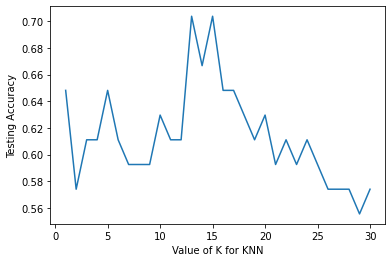

In [72]:
%matplotlib inline
import matplotlib.pyplot as plt

#plot the relationship between K and the testing accuracy
plt.plot(k_range,scores_list)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

nilai k dengan akurasi tertinggi

In [73]:
scores_list.index(max(scores_list))+1 , max(scores_list)

(13, 0.7037037037037037)

In [74]:
knn = KNeighborsClassifier(n_neighbors=scores_list.index(max(scores_list))+1)
knn.fit(X_train,y_train)
y_pred_knn =knn.predict(X_test)

cm = confusion_matrix(y_test,y_pred_knn)
precision = round(precision_score(y_test,y_pred_knn, average="macro")*100,2)
acc = round(accuracy_score(y_test,y_pred_knn)*100,2)
recall = round(recall_score(y_test,y_pred_knn, average="macro")*100,2)
f1score = round(f1_score(y_test, y_pred_knn, average="macro")*100,2)
print('Konfusi Matrix\n',cm)
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(f1score))
print('accuracy: {}'.format(acc))

Konfusi Matrix
 [[23  8]
 [ 8 15]]
precision: 69.71
recall: 69.71
fscore: 69.71
accuracy: 70.37


### Implementasi Pada data Input

Menggunakan KNN dengan nilai K = `11`

In [75]:
knn11 = joblib.load('/content/drive/MyDrive/datamining/tugas/cobamodel/modelKNN11.pkl')
knn_pred = knn11.predict(pred_input)
knn_pred

array([0, 0, 0, 0])

## Inisialisasi K-Means Clustering

### Eksekusi Pada Model

In [76]:
from sklearn.cluster import KMeans

# #Try running from n=1 through 30 and record testing accuracy
n_range = range(1,31)
akurasi = {}
akurasi_score = []
for k in n_range:
        # install model
        kmeans = KMeans(n_clusters=k,random_state=0)
        kmeans.fit(X_train,y_train)
        # save model
        filenameKMeans = '/content/drive/MyDrive/datamining/tugas/cobamodel/modelKMeans'+str(k)+'.pkl'
        joblib.dump(kmeans,filenameKMeans)
        y_pred=kmeans.predict(X_test)
        akurasi[k] = accuracy_score(y_test,y_pred)
        akurasi_score.append(accuracy_score(y_test,y_pred))
akurasi_score


[0.5740740740740741,
 0.6111111111111112,
 0.2962962962962963,
 0.1111111111111111,
 0.2037037037037037,
 0.35185185185185186,
 0.24074074074074073,
 0.12962962962962962,
 0.25925925925925924,
 0.09259259259259259,
 0.24074074074074073,
 0.09259259259259259,
 0.07407407407407407,
 0.037037037037037035,
 0.14814814814814814,
 0.037037037037037035,
 0.07407407407407407,
 0.037037037037037035,
 0.037037037037037035,
 0.1111111111111111,
 0.07407407407407407,
 0.037037037037037035,
 0.018518518518518517,
 0.037037037037037035,
 0.018518518518518517,
 0.018518518518518517,
 0.018518518518518517,
 0.037037037037037035,
 0.0,
 0.018518518518518517]

### Visualisasi Hasil K-means

Text(0, 0.5, 'Testing Accuracy')

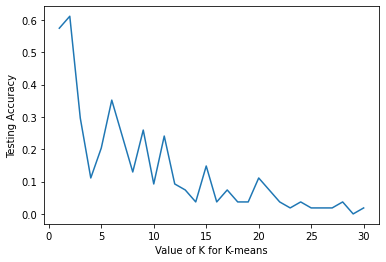

In [77]:
%matplotlib inline
import matplotlib.pyplot as plt

#plot the relationship between K and the testing accuracy
plt.plot(n_range,akurasi_score)
plt.xlabel('Value of K for K-means')
plt.ylabel('Testing Accuracy')

Nilai n dengan akurasi tertinggi

In [78]:
akurasi_score.index(max(akurasi_score)) , max(akurasi_score)

(1, 0.6111111111111112)

## Inisialisasi Decision Tree

### Eksekusi Pada Model

In [79]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(max_depth =5, random_state = 42)
dtc.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

### Decision Tree Rules Text

In [80]:
#import relevant functions
from sklearn.tree import export_text
#export the decision rules
tree_rules = export_text(dtc,
                        feature_names = list(nama_fitur))
#print the result
print(tree_rules)

|--- sex <= 0.50
|   |--- BP <= 129.00
|   |   |--- age <= 62.50
|   |   |   |--- class: 0
|   |   |--- age >  62.50
|   |   |   |--- age <= 65.00
|   |   |   |   |--- class: 1
|   |   |   |--- age >  65.00
|   |   |   |   |--- class: 0
|   |--- BP >  129.00
|   |   |--- age <= 54.50
|   |   |   |--- cholestrol <= 304.50
|   |   |   |   |--- class: 0
|   |   |   |--- cholestrol >  304.50
|   |   |   |   |--- class: 1
|   |   |--- age >  54.50
|   |   |   |--- age <= 62.50
|   |   |   |   |--- cholestrol <= 254.00
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- cholestrol >  254.00
|   |   |   |   |   |--- class: 1
|   |   |   |--- age >  62.50
|   |   |   |   |--- cholestrol <= 233.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- cholestrol >  233.50
|   |   |   |   |   |--- class: 0
|--- sex >  0.50
|   |--- age <= 53.50
|   |   |--- cholestrol <= 187.00
|   |   |   |--- class: 1
|   |   |--- cholestrol >  187.00
|   |   |   |--- BP <= 135.00
|   |   |   |   |--- BP <=

### Rules Decision Tree Plot Diagram

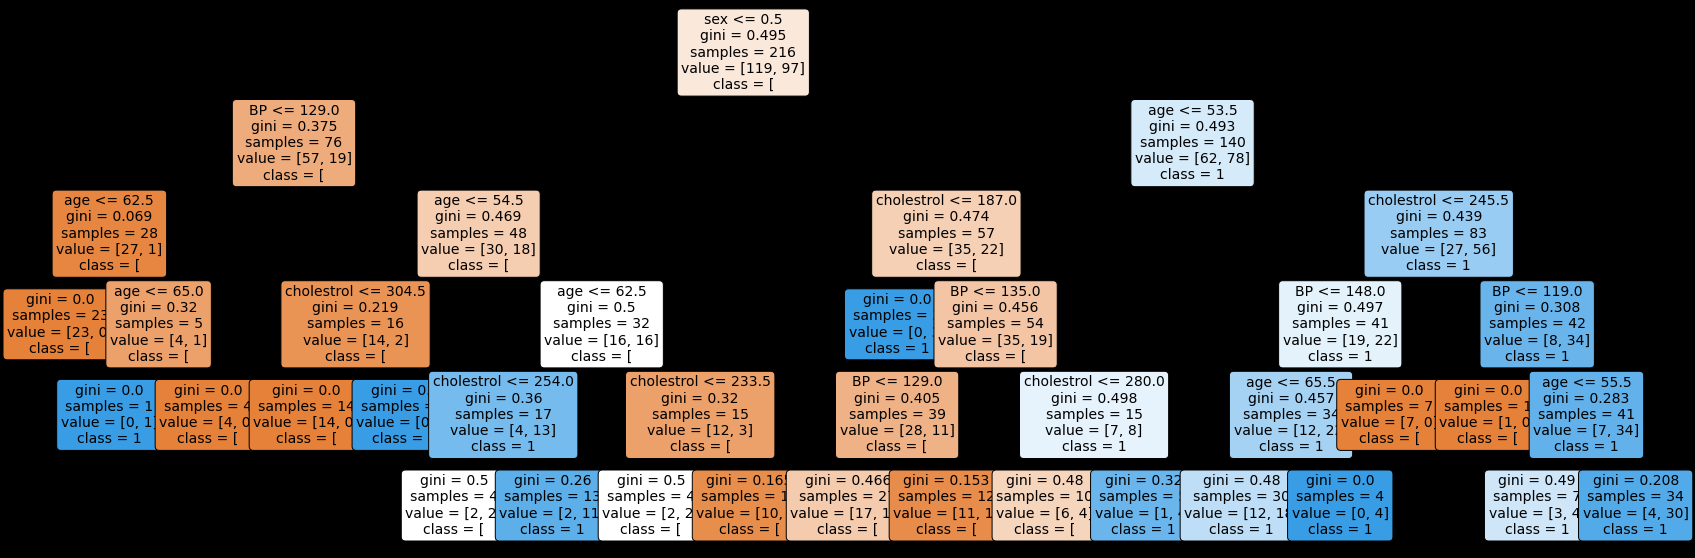

In [81]:
#import relevant packages
from sklearn import tree
import matplotlib.pyplot as plt

#plt the figure, setting a black background
plt.figure(figsize=(30,10), facecolor ='k')
#create the tree plot
a = tree.plot_tree(dtc,feature_names = nama_fitur,class_names = str(y),rounded = True,filled = True,fontsize=14)
#show the plot
plt.show()


### Hasil

In [82]:
dtc_pred = dtc.predict(X_test)
dtc_pred

array([0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0])

In [83]:
cm_dtc = confusion_matrix(y_test,dtc_pred)
precision_dtc = round(precision_score(y_test,dtc_pred, average="macro")*100,2)
acc_dtc = round(accuracy_score(y_test,dtc_pred)*100,2)
recall_dtc = round(recall_score(y_test,dtc_pred, average="macro")*100,2)
f1score_dtc = round(f1_score(y_test, dtc_pred, average="macro")*100,2)
print('Konfusi Matrix\n',cm_dtc)
print('precision: {}'.format(precision_dtc))
print('recall: {}'.format(recall_dtc))
print('fscore: {}'.format(f1score_dtc))
print('accuracy: {}'.format(acc_dtc))

Konfusi Matrix
 [[21 10]
 [11 12]]
precision: 60.09
recall: 59.96
fscore: 60.0
accuracy: 61.11
